In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dataset.drop(columns=['CustomerID','Genre','Age'],inplace=True)

In [9]:
dataset.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Income  200 non-null    int64
 1   Score   200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [13]:
dataset.shape

(200, 2)

**Dendogram**

**To find the optimal number of clusters**

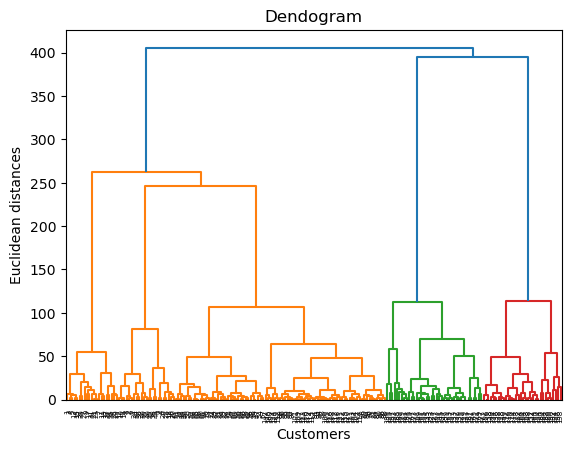

In [21]:
import scipy.cluster.hierarchy as sch
data = sch.linkage(dataset, method = 'ward')

dendogram = sch.dendrogram(data)

plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

**Hierarchical Clustering Model**

In [26]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, metric='euclidean',linkage='ward')

y_hc = hc.fit_predict(dataset)

In [28]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [30]:
dataset['Cluster'] = pd.DataFrame(y_hc)
dataset

,Income,Score,Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


**Visualising the clusters**

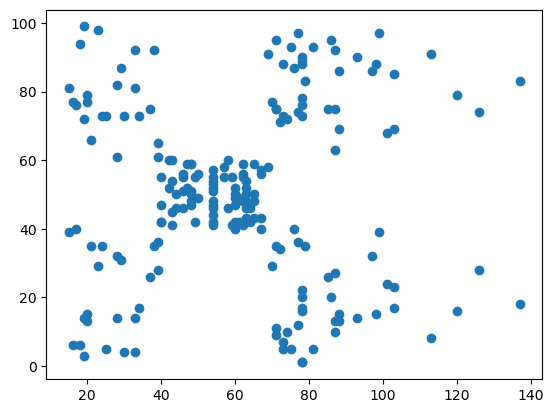

In [33]:
a = dataset.iloc[:,0]
b = dataset.iloc[:,1]

plt.scatter(a,b)
plt.show()

In [35]:
plt.scatter(dataset[y_hc == 0, 0],dataset[y_hc == 0, 1],
            s = 100, c = 'red', label = 'cluster 1')

plt.scatter(dataset[y_hc == 1, 0],dataset[y_hc == 1, 1],
            s = 100, c = 'blue', label = 'cluster 2')

plt.scatter(dataset[y_hc == 2, 0],dataset[y_hc == 2, 1],
            s = 100, c = 'green', label = 'cluster 3')

plt.scatter(dataset[y_hc == 3, 0],dataset[y_hc == 3, 1],
            s = 100, c = 'cyan', label = 'cluster 4')

plt.scatter(dataset[y_hc == 4, 0],dataset[y_hc == 4, 1],
            s = 100, c = 'magenta', label = 'cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

InvalidIndexError: (array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False,  True, False,  True, False, False, False,
        True, False, False, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False, False, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False]), 0)